<a href="https://colab.research.google.com/github/praaatik/pytorch/blob/main/food_101_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Get the data (image in this case), convert them to `DataSets`.
- Convert `DataSets` to `DataLoaders`.

In [1]:
import requests
import zipfile
from pathlib import Path
import os
import random
from PIL import Image

import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.xkcd()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

BATCH_SIZE=32

In [2]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [3]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Directories -> {len(dirnames)}, Images -> {len(filenames)} in {dirpath}.")

In [4]:
walk_through_dir(image_path)

Directories -> 2, Images -> 0 in data/pizza_steak_sushi.
Directories -> 3, Images -> 0 in data/pizza_steak_sushi/train.
Directories -> 0, Images -> 75 in data/pizza_steak_sushi/train/steak.
Directories -> 0, Images -> 78 in data/pizza_steak_sushi/train/pizza.
Directories -> 0, Images -> 72 in data/pizza_steak_sushi/train/sushi.
Directories -> 3, Images -> 0 in data/pizza_steak_sushi/test.
Directories -> 0, Images -> 19 in data/pizza_steak_sushi/test/steak.
Directories -> 0, Images -> 25 in data/pizza_steak_sushi/test/pizza.
Directories -> 0, Images -> 31 in data/pizza_steak_sushi/test/sushi.


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [6]:
print(train_dir, test_dir, sep="\n")

data/pizza_steak_sushi/train
data/pizza_steak_sushi/test


Random image path: data/pizza_steak_sushi/train/pizza/2228322.jpg
Image class: pizza
Image height: 512
Image width: 512


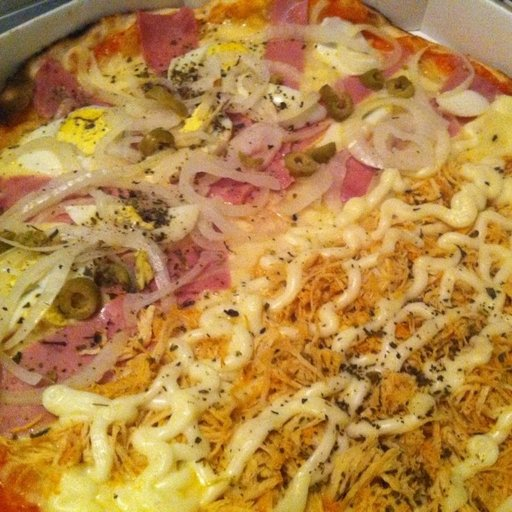

In [7]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

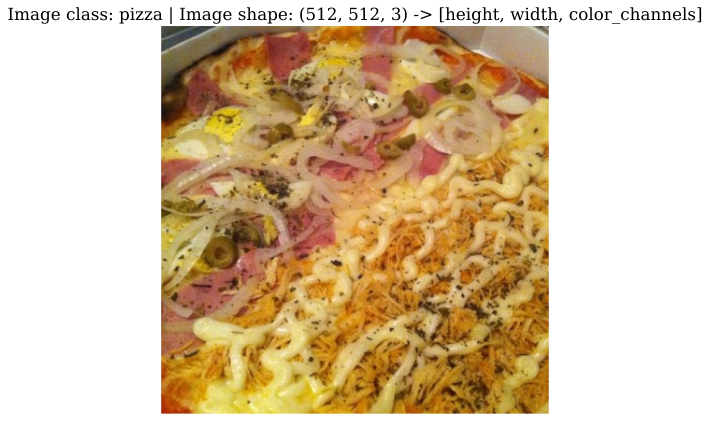

In [8]:
img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [9]:
img_as_array.shape

(512, 512, 3)

In [10]:
data_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [11]:
data_transforms(img)

tensor([[[0.5255, 0.5765, 0.7255,  ..., 0.2627, 0.2627, 0.2824],
         [0.7020, 0.7333, 0.7137,  ..., 0.2980, 0.2980, 0.2902],
         [0.7255, 0.7098, 0.7059,  ..., 0.3216, 0.2784, 0.3020],
         ...,
         [0.7020, 0.6863, 0.6078,  ..., 0.7373, 0.7216, 0.6980],
         [0.7412, 0.7059, 0.6588,  ..., 0.7255, 0.7176, 0.6902],
         [0.7647, 0.7333, 0.6510,  ..., 0.7098, 0.7059, 0.6667]],

        [[0.4941, 0.5608, 0.7098,  ..., 0.2784, 0.2706, 0.2941],
         [0.6706, 0.7020, 0.6627,  ..., 0.3176, 0.3216, 0.3098],
         [0.6745, 0.6549, 0.6392,  ..., 0.3255, 0.3137, 0.3373],
         ...,
         [0.4627, 0.4588, 0.4000,  ..., 0.3882, 0.3255, 0.2627],
         [0.5882, 0.5098, 0.4510,  ..., 0.3176, 0.2784, 0.2235],
         [0.6667, 0.5922, 0.4588,  ..., 0.2549, 0.2353, 0.1765]],

        [[0.4314, 0.5020, 0.6314,  ..., 0.2235, 0.2235, 0.2627],
         [0.6000, 0.6353, 0.5765,  ..., 0.3098, 0.3020, 0.2784],
         [0.5961, 0.5569, 0.5412,  ..., 0.3216, 0.3137, 0.

[PosixPath('data/pizza_steak_sushi/train/steak/1382427.jpg')]


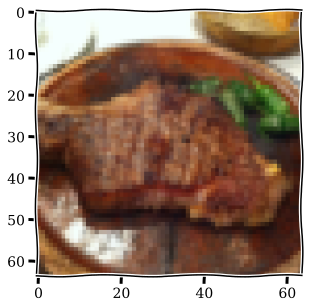

In [12]:
random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.sample(image_path_list, k=1)
print(random_image_path)

with Image.open('data/pizza_steak_sushi/train/steak/1382427.jpg') as f:
  f1 = data_transforms(f).permute(1, 2, 0)
  plt.imshow(f1)
  plt.show()

In [13]:
random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.sample(image_path_list, k=1)
print(random_image_path)

with Image.open('data/pizza_steak_sushi/train/steak/1382427.jpg') as f:
  t = data_transforms(f)
  print(t.size())
  print(f.size)

  # plt.imshow(f)
  # plt.show()

[PosixPath('data/pizza_steak_sushi/train/steak/1382427.jpg')]
torch.Size([3, 64, 64])
(512, 512)


In [14]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)

      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")

      transformed_image = data_transforms(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.size()}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

# plot_transformed_images(image)

In [15]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list)

[PosixPath('data/pizza_steak_sushi/train/steak/1264154.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/1257104.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2324994.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/176508.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3518960.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/1849463.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/461689.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2825100.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2603058.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2222018.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3142045.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2087958.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/167069.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/234626.jpg'), PosixPath('data/pizza_steak

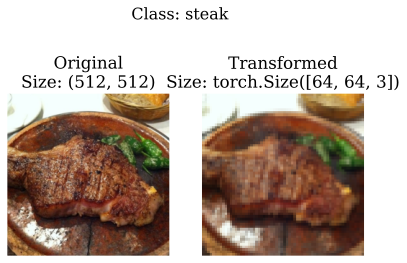

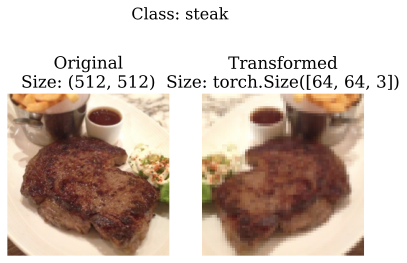

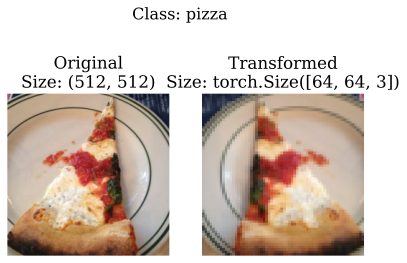

In [16]:
plot_transformed_images(image_paths=image_path_list, transform=data_transforms,n=3)

In [17]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")
print("\n")
print(type(train_data))

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


<class 'torchvision.datasets.folder.ImageFolder'>


In [18]:
classes = train_data.classes
classes_dict = train_data.class_to_idx

print(classes, classes_dict, sep="\n")

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


In [19]:
print(len(train_data), len(test_data))

225 75


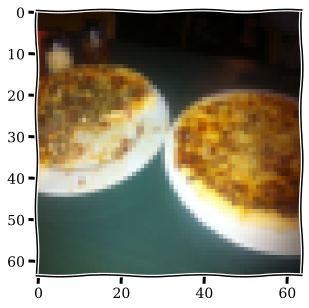

In [20]:
for i in train_data:
  plt.imshow(i[0].permute(1, 2, 0))
  break

In [21]:
os.cpu_count()

2

In [22]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=1)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=1)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d3d2705f7c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d3d2705e5c0>)

In [23]:
next(iter(test_dataloader))

[tensor([[[[0.1020, 0.1333, 0.0824,  ..., 0.3725, 0.2039, 0.0471],
           [0.1137, 0.1255, 0.0784,  ..., 0.2667, 0.1961, 0.2000],
           [0.1255, 0.1255, 0.1059,  ..., 0.1333, 0.1176, 0.0980],
           ...,
           [0.0980, 0.1059, 0.0863,  ..., 0.0235, 0.0196, 0.0196],
           [0.0941, 0.1020, 0.0863,  ..., 0.0235, 0.0235, 0.0196],
           [0.0863, 0.0980, 0.0980,  ..., 0.0235, 0.0196, 0.0196]],
 
          [[0.0235, 0.0353, 0.0235,  ..., 0.2471, 0.1255, 0.0196],
           [0.0235, 0.0275, 0.0157,  ..., 0.1608, 0.1216, 0.1333],
           [0.0235, 0.0196, 0.0314,  ..., 0.0784, 0.0667, 0.0588],
           ...,
           [0.0196, 0.0235, 0.0196,  ..., 0.0078, 0.0039, 0.0039],
           [0.0196, 0.0235, 0.0196,  ..., 0.0078, 0.0078, 0.0039],
           [0.0196, 0.0235, 0.0314,  ..., 0.0078, 0.0039, 0.0039]],
 
          [[0.0039, 0.0078, 0.0039,  ..., 0.0588, 0.0392, 0.0118],
           [0.0039, 0.0078, 0.0039,  ..., 0.0431, 0.0314, 0.0510],
           [0.0039, 0.00

Text(0.5, 1.0, 'pizza')

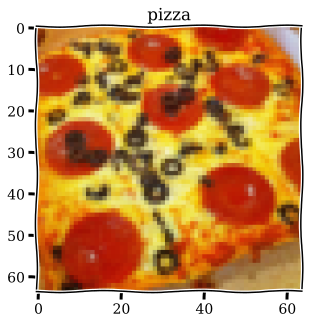

In [44]:
random_number = random.randint(0, 32)
image, label = next(iter(train_dataloader))
plt.imshow(image[random_number].permute(1, 2, 0))
plt.title(classes[label[random_number]])